# Описание проекта

## Краткое описание 

Заказчик - сеть фитнес-центров.
Проблема - отток клиентов.
Заказчик хочет с помощью инструментов анализа данных снизить уровень оттока клиентов.

## Задача

- Выявить основные признаки, наиболее сильно влияющие на отток, построить прогноз вероятности оттока для каждого клиента в горизонте 1 месяца и предложить меры по снижению оттока клиентов;
- Выделить типичные портреты клиентов и их свойства, разработать рекомендации по взаимодействию с разными группами клиентов и определить другие особенности взаимодействия.

## Данные

Таблица, которая содержит данные на месяц до оттока и факт оттока на определённый месяц, с полями:
- 'churn' - факт оттока в текущем месяце;
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).<br>

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


# Решение

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head(1)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.22747,5.0,3,0.020398,0.0,0


Для удобства привела все названия столбцов к нижнему регистру

<code style="background:lavender;color:black">Вывод: В данных нет пропущенных значений. Названия столбцов привела к нижнему регистру.</code>

## Шаг 2.  Исследовательский анализ данных(EDA)

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- У тех, кто ушел средний возраст примерно 27, у тех, кто остался - 30;
- Ушедшие в предыдущем месяце в неделю посещали в два раза меньше занятий;
- За все время разница в частоте занятий в неделю меньше, чем за предыдущий месяц, то есть ушедшие ближе к уходу начинают посещать фитнес реже;
- Ушедшие, в среднем посещали групповые занятия реже, чем оставшиеся
- Среди ушедших в 2 раза меньше тех, кто воспользовался промо "Приведи друга"
- Как правило, те, кто уходит на момент ухода владеют "коротким" абонементом

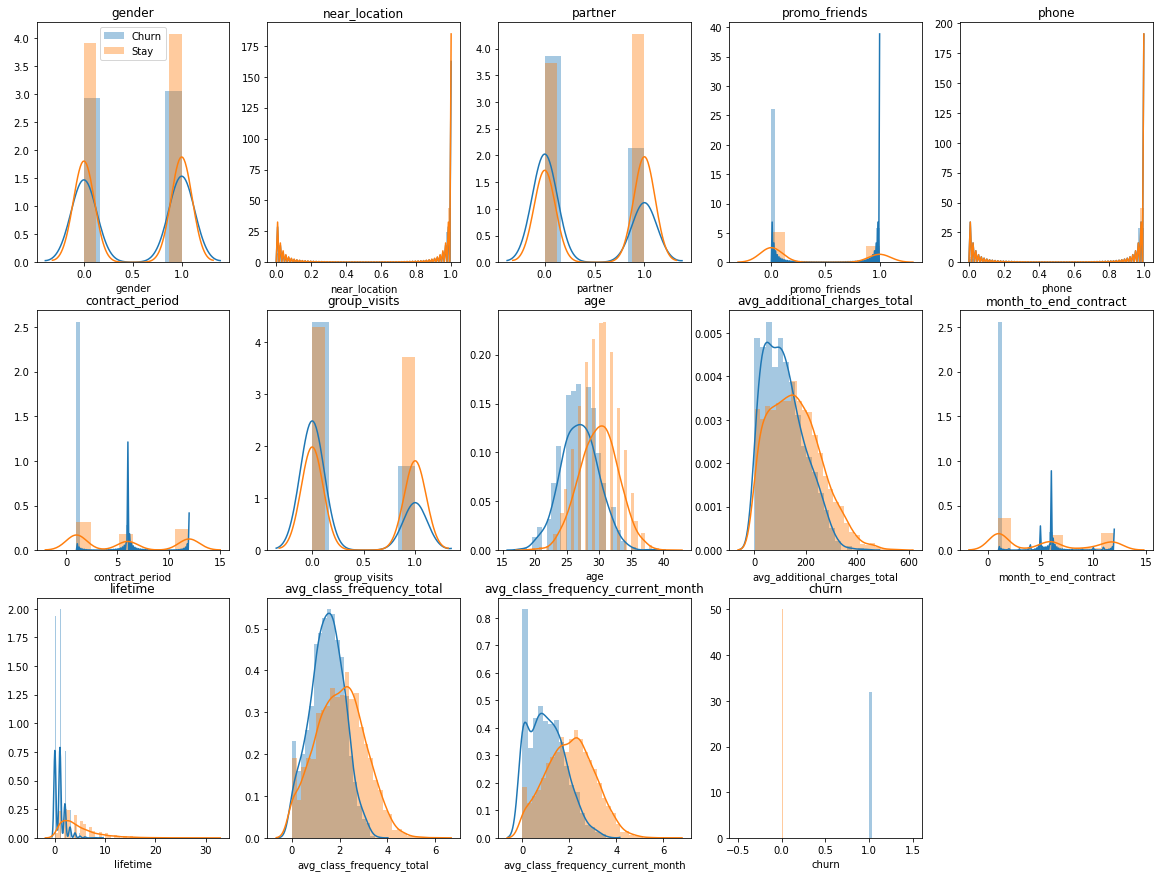

In [9]:
plt.subplots(figsize= (20, 15))
num_cols = 5
num_rows = len(df.columns.values)//num_cols + 1
for i, col in enumerate(df.columns.values):
    sns.distplot(df.query('churn == 1')[col], label = 'Churn', ax=plt.subplot(num_rows, num_cols, i+1))
    sns.distplot(df.query('churn == 0')[col], label = 'Stay')
    plt.title(col)
    if i == 0:plt.legend()

- Среди мужчин и женщин доля ушедших примерно одинакова;
- Среди тех, кто пришел не по партнерской программе, доля ушедших почти в 2 раза выше, чем у тех, кто по партнерской программе;
- Уходящие моложе;

In [10]:
corr = df.corr()

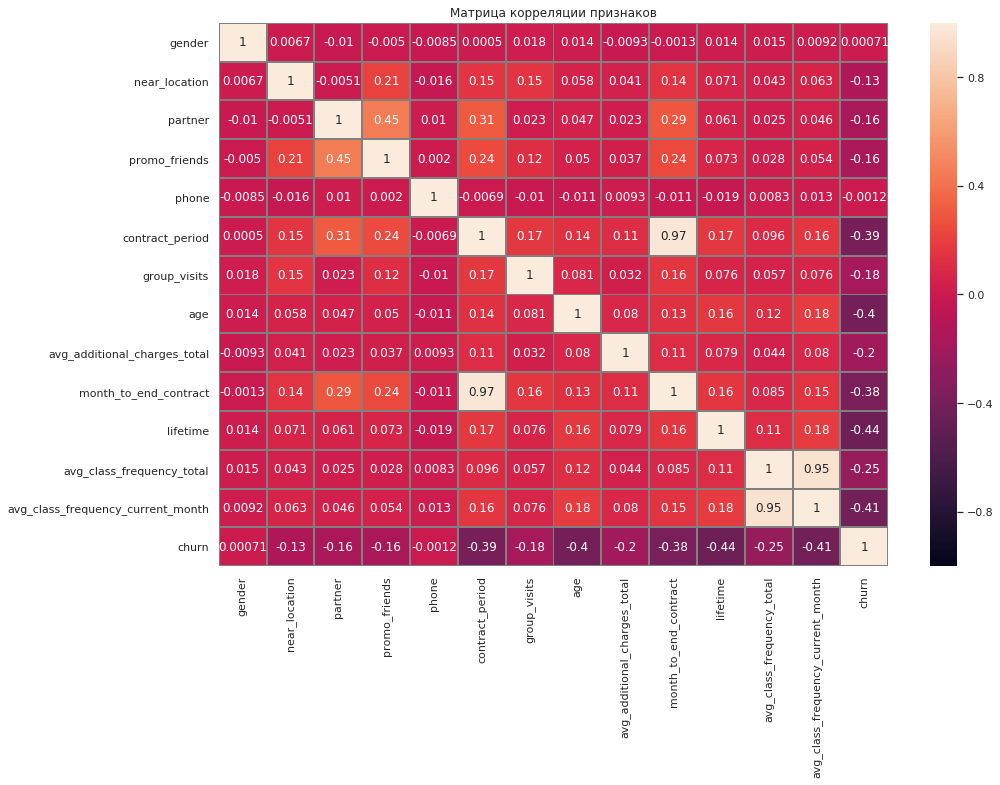

In [11]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Матрица корреляции признаков')
sns.heatmap(corr, annot=True, linewidths=1, linecolor='gray', vmax=1, vmin=-1)
plt.show()

- Высокая корреляция между показателями: Длительность текущего абонемента - Срок до окончания текущего абонемента, средняя частота посещений в неделю за предыдущий месяц - средняя частота посещений за все время, что закономерно, так как это взаимосвязанные показатели.
- Отрицательная средняя корреляция есть между: фактом оттока и средней частотой в предыдущем месяце, сроком до окончания абонемента, продолжительность с момента первого посещения, возрастом и длительностью текущего абонемента

<code style="background:lavender;color:black">В данном блоке выяснили, что на факт оттока влияют такие показатели, как: частота посещений в предыдущий месяц, клиенты ближе к уходу посещают спортзал реже; длительность и срок до окончания абонемента, у тех, кто уходит, чаще бывает абонемент с короткой продолжительностью. Те, кто уходит, моложе года на 3 тех, кто остается.

##  Шаг 3. Модель прогноза оттока клиентов

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

Создаю:
y - целевой признак,
X - вектор признаков

In [13]:
y = df['churn']
X = df.drop('churn', axis=1)

Создаю функцию расчета метрик

In [14]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Делю данные на обучающую и валидационную выборку

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизирую данные с помощью функции StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Задаю алгоритм для модели логистической регрессии

In [18]:
lr_model = LogisticRegression(random_state=0)

Обучаю модель

In [19]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

С помощью обученной модели строю прогнозы

In [20]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

Считаю метрики

In [21]:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


Получили метрики accuracy, precision и recall, результат по accuracy довольно высокий = 0.92

Задаю алгоритм для модели случайного леса

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

Обучаю модель

In [23]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

С помощью обученной модели строю прогнозы

In [24]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Считаю метрики

In [25]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Получили метрики, здесь тоже результат по accuracy = 0.92

<code style="background:lavender;color:black">На основании полученных метрик модель логистической регрессии показала себя немного лучше, чем модель случайного леса. Показатели accuracy равны у обеих моделей и составили 0.92, precision в первой модели 0.85, а во второй 0.84, recall в первой - 0.83, а во второй - 0.81.

## Шаг 4.  Кластеризация клиентов

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Стандартизируем данные

In [27]:
sc = StandardScaler()

In [28]:
X_sc = sc.fit_transform(df)

С помощью функции linkage строим матрицу расстояний

In [29]:
linked = linkage(X_sc, method = 'ward')

Рисуем дендрограмму

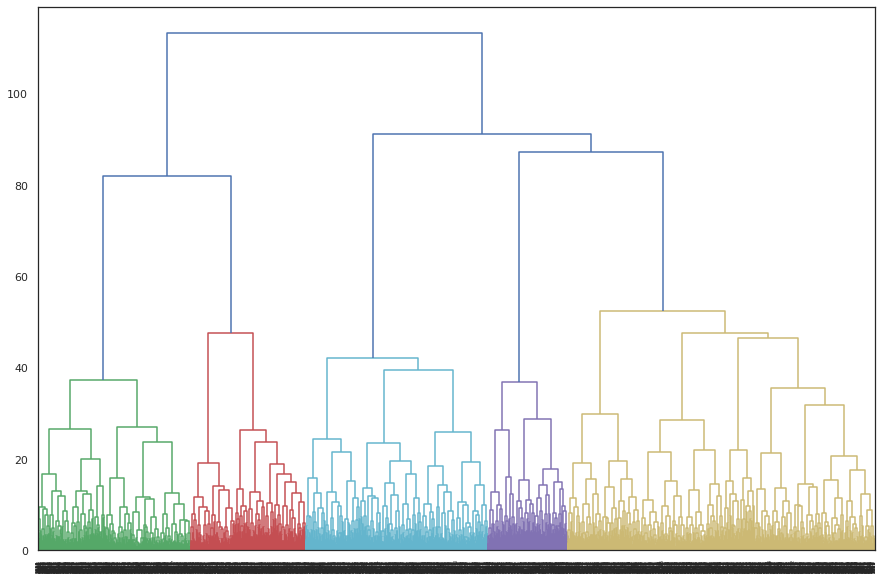

In [30]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

На основании графика можно выделить 5 кластеров клиентов

Обучим модель по алгоритму KMeans

In [31]:
km = KMeans(n_clusters = 5)

In [32]:
labels = km.fit_predict(X_sc)

In [33]:
df['cluster_km'] = labels

In [34]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.476301,0.825434,0.447399,0.253179,1.000000,2.647399,0.381503,30.017341,153.490037,2.464740,4.669364,1.183720,1.182760,0.001156
1,0.503106,0.938923,0.768116,0.564182,1.000000,11.173913,0.557971,29.899586,161.514913,10.223602,4.704969,2.006679,2.001081,0.015528
2,0.549645,0.842790,0.374704,0.216312,0.998818,2.750591,0.442080,29.977541,160.245842,2.528369,4.593381,2.933126,2.939963,0.007092
3,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708
4,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872


Можно заметить, что есть значительная разница по некоторым признакам. Например, у кластера 0 длительность текущего абонемента намного выше, чем у остальных. У кластера 2 время с первого обращения в центр значительно ниже, чем у остальных, также у кластера 2 факт оттока выше, чем у всех остальных.

In [35]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


Построила диаграмму для категориальных признаков

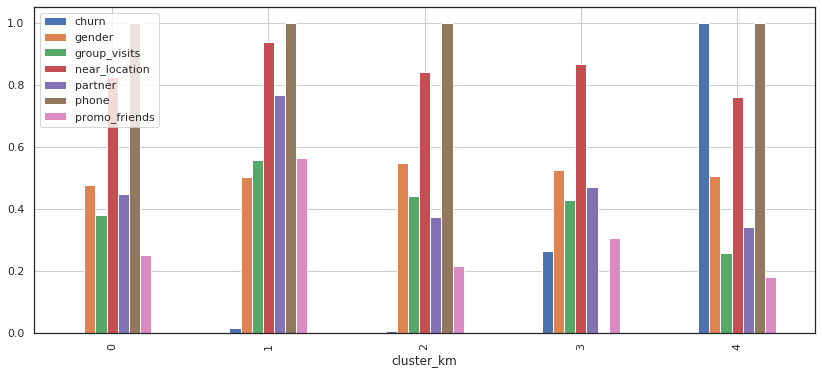

In [36]:
(
    df
    .pivot_table(index='cluster_km', values=['gender', 'near_location','partner','promo_friends', 'phone', 'group_visits', 'churn'], aggfunc='mean')
    .plot(kind='bar', figsize=(14, 6), grid=True)
)
plt.show()

Построила диаграмму для числовых признаков

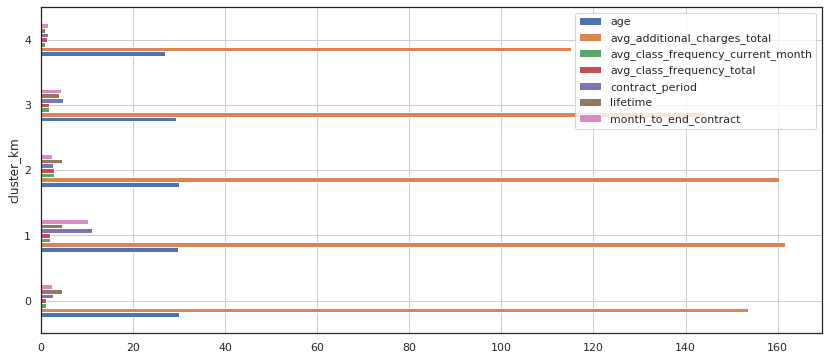

In [37]:
(
    df
    .pivot_table(index='cluster_km', values=['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], aggfunc='mean')
    .plot(kind='barh', figsize=(14, 6), grid=True)
)
plt.show()

In [38]:
rate_churn = df.groupby('cluster_km')['churn'].agg(['sum', 'count']).reset_index()
rate_churn

,cluster_km,sum,count
0,0,1,865
1,1,15,966
2,2,6,846
3,3,101,383
4,4,938,940


In [39]:
rate_churn['rate'] = (rate_churn['sum']/rate_churn['count']).round(3)

In [40]:
rate_churn

,cluster_km,sum,count,rate
0,0,1,865,0.001
1,1,15,966,0.016
2,2,6,846,0.007
3,3,101,383,0.264
4,4,938,940,0.998


По доле оттока кластеры сильно отличаются. В кластере 1 процент оттока крайне высокий и составляет 99,8%, а в кластере 2 процент оттока практически нулевой.

<code style="background:lavender;color:black">Выделила 5 кластеров клиентов. Доля оттока в кластере 1 очень высокая, в этом кластере клиенты моложе, чем в остальных. Меньше тратятся на другие услуги фитнес-центра. Частота посещений в предыдущем месяце ниже, чем в остальных. Меньше посещают групповые занятия, меньше использовали промокод "Приведи друга". Кластеры отличаются по некоторым признакам: например, в кластере 4 клиенты не предоставили номер мобильного телефона/или не имеют его, в кластере 0 почти в 2 раза больше тех, кто участвовал в программе "Приведи друга", чем в остальных кластерах. По некоторым признакам кластеры практически не отличаются: по полу, расположение от дома или места работы(небольшая разница), 

## Шаг 5. Выводы и рекомендации

<code style="background:lavender;color:black">Портрет клиента, который вот-вот уйдет: клиент начал реже посещать спортзал, при этом у него был короткий абонемент и до окончания действия абонемента остался небольшой срок, он нечасто посещает групповые занятия, не пришел по рекомендации друга и не по партнерской программе, осообо не тратится на дополнительные услуги зала и средний возраст его 27.
Я бы выделила две основные причины его ухода: 1) деньги(поскольку он достаточно молодой, не тратится на доп.услуги, у него нет скидки по партнерской программе) и 2) отсутствие единомышленников (не ходит на групповые, его привел не друг).
Соответственно, я бы рекомендовала следующие меры по снижению оттока: 1) предложить скидку при продлении абонемента 2)выгодное предложение для двоих, троих (чтобы у клиента появился стимул кого-то привести), так у него появится единомышленник, вместе веселее заниматься спортом.